In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web    
import datetime as dt
import seaborn as sns
import geopandas as gpd

In [83]:
codes= ['UNRATE', 'GDPC1', 'A939RX0Q048SBEA', 'FGEXPND', 'ETOTALUSQ176N']
labels=['unem_rate_m', 'gdp_q', 'gdppc_q', 'gov_exp_q', 'house_q']

fred = web.DataReader(codes,'fred', start='04-01-2000',end='01-01-2018').set_axis(labels, axis=1)
fred['unem_rate_q'] = fred['unem_rate_m'].resample('QS').mean()
fred.head()

,unem_rate_m,gdp_q,gdppc_q,gov_exp_q,house_q,unem_rate_q
DATE,,,,,,
2000-04-01,3.8,14130.908,50109.0,1908.645,116047.0,3.933333
2000-05-01,4.0,NaN,NaN,NaN,NaN,NaN
2000-06-01,4.0,NaN,NaN,NaN,NaN,NaN
2000-07-01,4.0,14145.312,50024.0,1918.617,116482.0,4.000000
2000-08-01,4.1,NaN,NaN,NaN,NaN,NaN


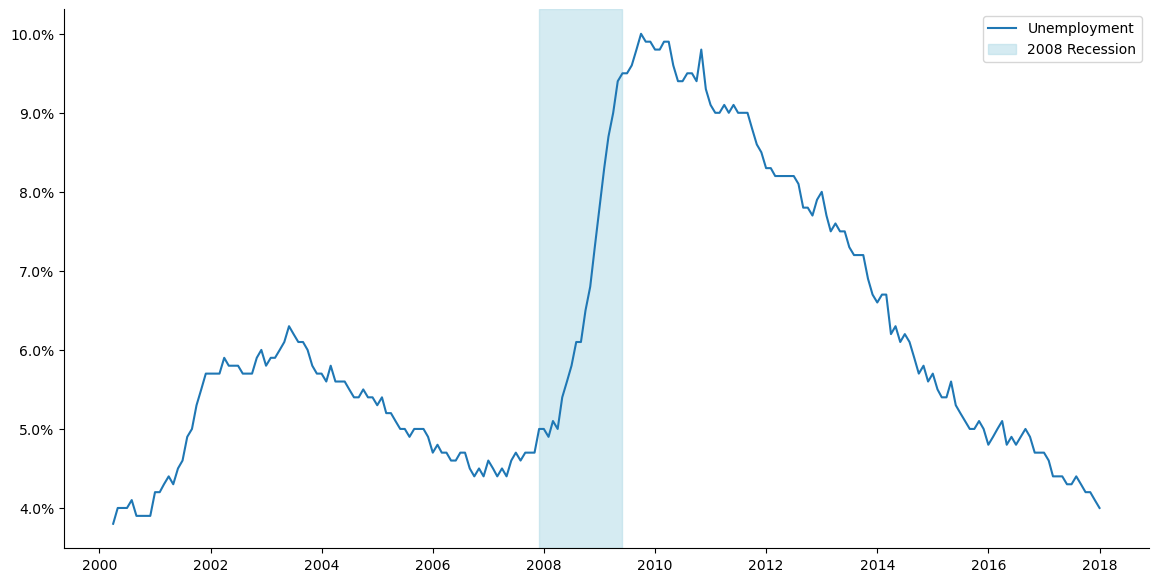

In [89]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(fred.index, fred['unem_rate_m'], label='Unemployment')
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend()
sns.despine()
plt.show()

In [126]:
fred['gdp_gr'] = fred['gdp_q'].dropna().pct_change(freq='QS')*100
fred['unem_gr'] = fred['unem_rate_m'].dropna().pct_change(freq='QS')*100
gdp_unem_gr = fred[['gdp_gr','unem_gr']].dropna()
gdp_unem_gr.head()

,gdp_gr,unem_gr
DATE,,
2000-07-01,0.101933,5.263158
2000-10-01,0.597039,-2.500000
2001-01-01,-0.327799,7.692308
2001-04-01,0.624503,4.761905
2001-07-01,-0.400639,4.545455


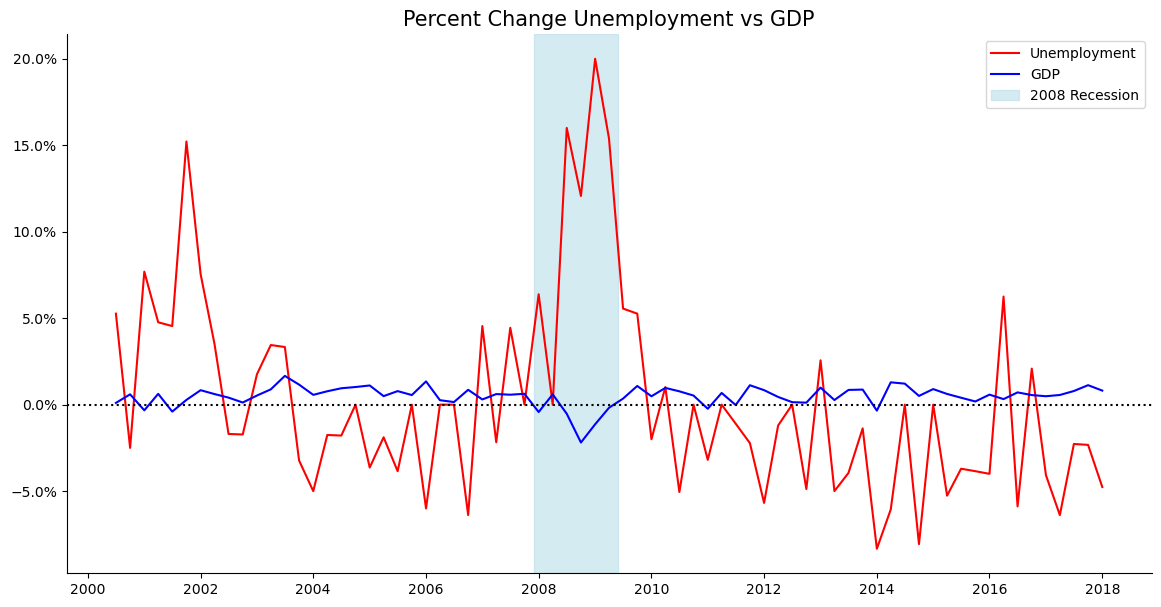

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(gdp_unem_gr.index, gdp_unem_gr['unem_gr'], color='red', label='Unemployment')
ax.plot(gdp_unem_gr.index, gdp_unem_gr['gdp_gr'], color='blue', label='GDP')
ax.axvspan('2007-12', '2009-06', color='lightblue', alpha=0.5, label='2008 Recession')
ax.axhline(color='black',ls=':')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Percent Change Unemployment vs GDP',size=15)

ax.legend()
sns.despine()
plt.show()